In [101]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

layer_1 = []
layer_2 = []

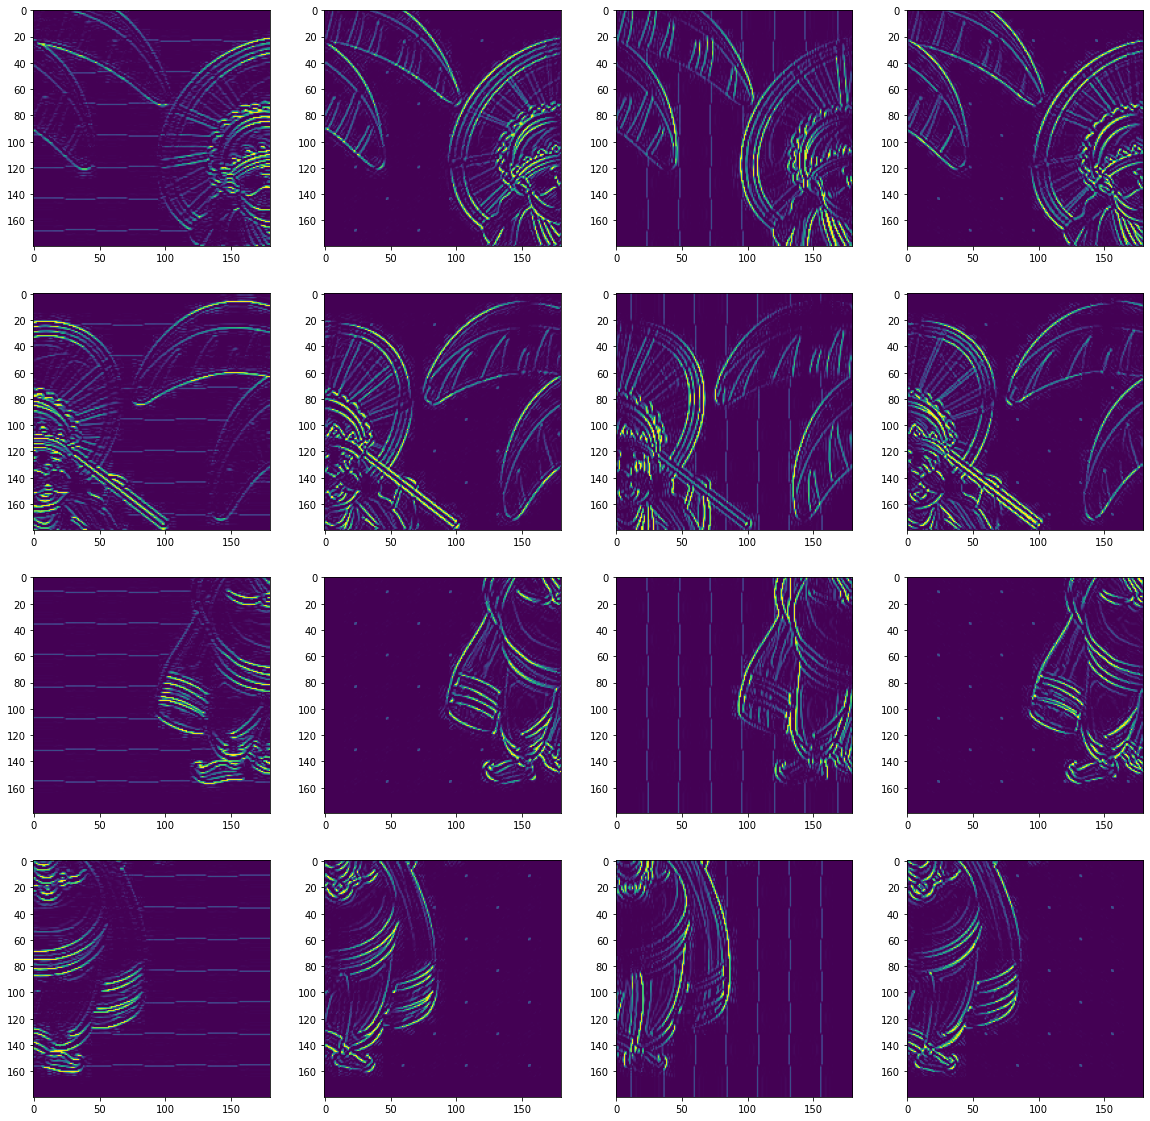

In [102]:
image = cv2.imread('image.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

convolution_kernel_0_deg = np.array([[-1, -1, -1],
                               [2, 2, 2],
                               [-1, -1, -1]])

convolution_kernel_45_deg = np.array([[-1, -1, 2],
                               [-1, 2, -1],
                               [2, -1, -1]])

convolution_kernel_90_deg = np.array([[-1, 2, -1],
                               [-1, 2, -1],
                               [-1, 2, -1]])

convolution_kernel_135_deg = np.array([[2, -1, -1],
                               [-1, 2, -1],
                               [-1, -1, 2]]) 
kernels = [convolution_kernel_0_deg, convolution_kernel_45_deg, convolution_kernel_90_deg, convolution_kernel_135_deg]

(h, w) = gray.shape[:2]
(cX, cY) = (w // 2, h // 2)

topLeft = gray[0:cY, 0:cX]
topRight = gray[0:cY, cX:w]
bottomLeft = gray[cY:h, 0:cX]
bottomRight = gray[cY:h, cX:w]

segments = [topLeft, topRight, bottomLeft, bottomRight]
fig, axs = plt.subplots(4,4,figsize=(20,20))
for i in range(0, 4):
    store_corner = []
    for j in range(0, 4):
        result = cv2.filter2D(segments[i], -1, kernels[j])
        axs[i][j].imshow(np.array(result))
        store_corner.append(result)
    layer_1.append(np.array(store_corner))


#cv2.waitKey(0)


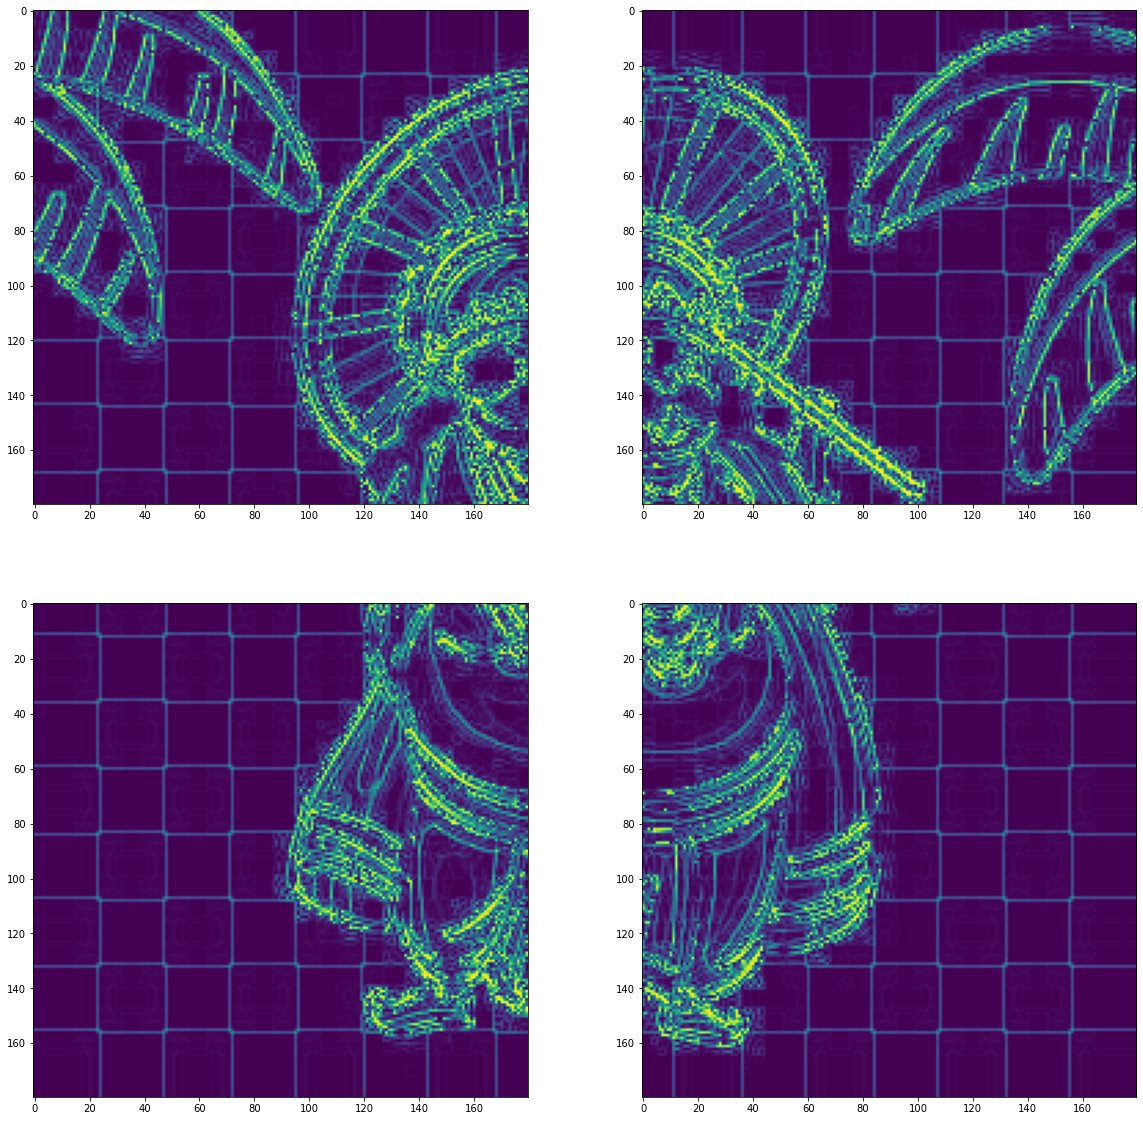

In [103]:
for k in range(0, 4):
    resultant_angle = layer_1[k][0]
    for l in range(1, 4):
        resultant_angle += layer_1[k][l]
    layer_2.append(np.array(resultant_angle))
fig, axs = plt.subplots(2,2,figsize=(20,20))
axs[0][0].imshow(layer_2[0])
axs[0][1].imshow(layer_2[1])
axs[1][0].imshow(layer_2[2])
axs[1][1].imshow(layer_2[3]);

In [104]:
final_output = np.zeros((360, 360))
for a in range(0, 180):
    for b in range(0, 180):
        final_output[a][b] = layer_2[0][a][b]
for a in range(0, 180):
    for b in range(180, 360):
        final_output[a][b] = layer_2[1][a][b-180]

for a in range(180, 360):
    for b in range(0, 180):
        final_output[a][b] = layer_2[2][a-180][b]

for a in range(180, 360):
    for b in range(180, 360):
        final_output[a][b] = layer_2[3][a-180][b-180]

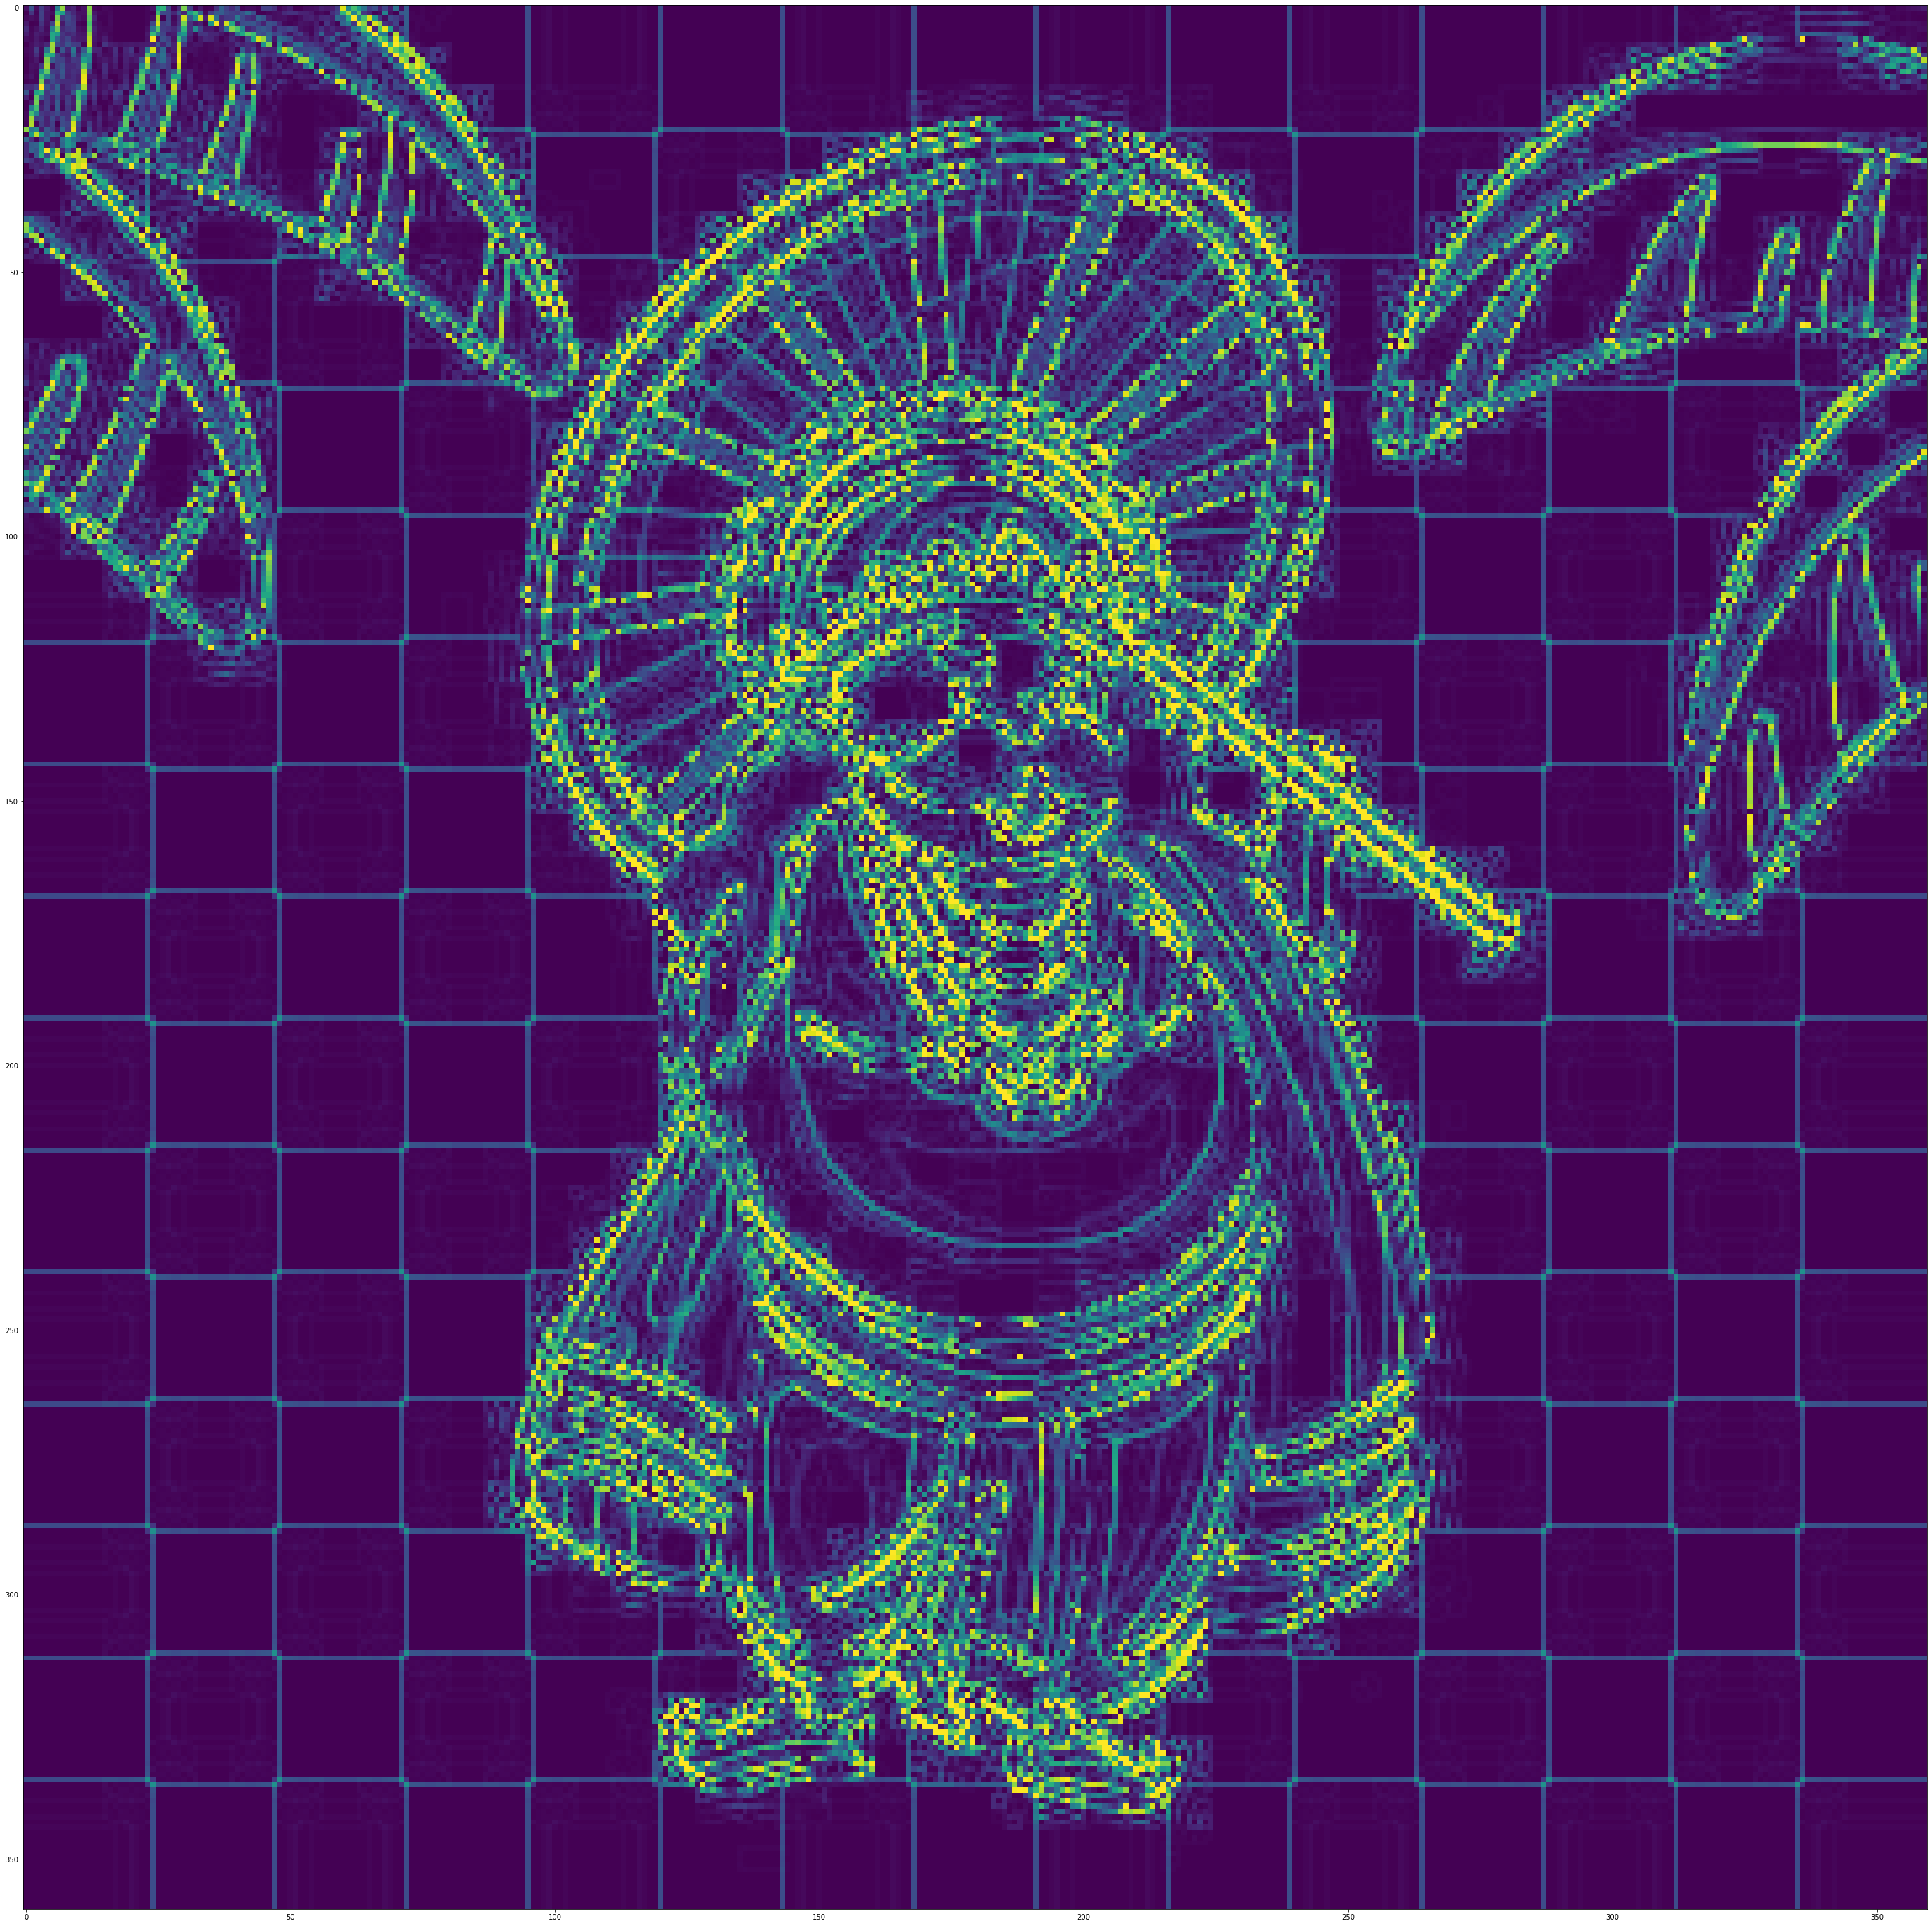

In [105]:
fig, ax = plt.subplots(figsize=(50, 50))
ax.imshow(final_output);